In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

In [2]:
# Columns from "InternationalTourism" and "Unemployment analysis.csv" dataset are per country
# Columns from "CitiesData" dataset are per city
data = pd.read_csv('Data/merged_data.csv')
data.head()

,geoname_id,area_name,feature_code,Country Name,population,elevation,dem,coordinates,timezone,modification_date,Year,Country Code,Number of Arrivals,Number of Departures,Expenditures,Unemployment rate
0,2660400,Hausen am Albis / Hausen (Dorf),PPL,Switzerland,3253,620.0,613,"{'lon': 8.53299, 'lat': 47.24496}",Europe/Zurich,2013-07-04 00:00:00+00:00,2013,CHE,8967000.0,12403000.0,1.909300e+10,4.75
1,2661394,Brig,PPLA2,Switzerland,5000,680.0,677,"{'lon': 7.9833300000000005, 'lat': 46.31667}",Europe/Zurich,2013-02-28 00:00:00+00:00,2013,CHE,8967000.0,12403000.0,1.909300e+10,4.75
2,6946577,Aire-la-Ville,PPL,Switzerland,1100,350.0,377,"{'lon': 6.04287, 'lat': 46.19057}",Europe/Zurich,2013-02-26 00:00:00+00:00,2013,CHE,8967000.0,12403000.0,1.909300e+10,4.75
3,2659109,Ramsen,PPL,Switzerland,1316,418.0,415,"{'lon': 8.80949, 'lat': 47.70797}",Europe/Zurich,2013-03-28 00:00:00+00:00,2013,CHE,8967000.0,12403000.0,1.909300e+10,4.75
4,2661758,Amden,PPLA3,Switzerland,1557,903.0,910,"{'lon': 9.14233, 'lat': 47.14888}",Europe/Zurich,2013-04-02 00:00:00+00:00,2013,CHE,8967000.0,12403000.0,1.909300e+10,4.75


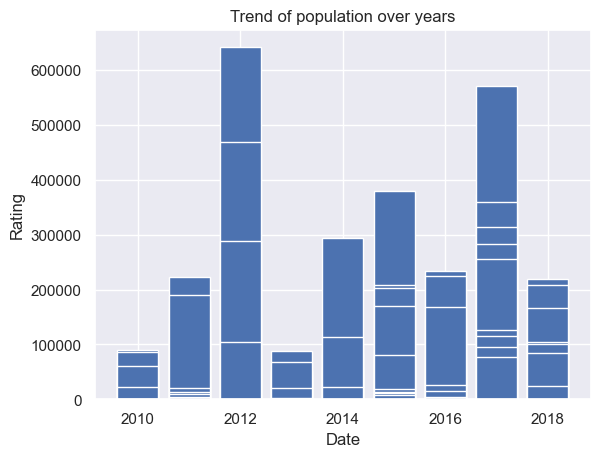

In [3]:
#seeing popultaion trend
seaborn.set()
plt.bar(data['Year'],data['population'])
plt.title('Trend of population over years')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

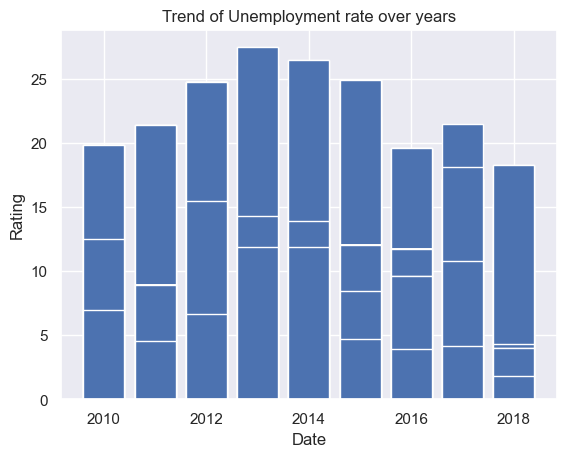

In [4]:
#seeing unemployment trend
plt.bar(data['Year'],data['Unemployment rate'])
plt.title('Trend of Unemployment rate over years')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [5]:
#number of distinct countries
data['Country Name'].nunique()

49

In [8]:
#group the data by Country Name, Year, Unemployment rate
data = data.groupby(['Country Name', 'Year','Unemployment rate']).agg({"population":"sum"})
data = data.reset_index()

# as the data is not structered and it is not available for each country for each year
# so found the avergae population for each country 
data_aggregate = data.copy()
data_aggregate = data.groupby(['Country Name']).agg({"population":"mean","Unemployment rate":"mean"})
data_aggregate = data_aggregate.reset_index()
   
data_aggregate['population'] = data_aggregate['population']/1000 #converting population into thousands
data_aggregate['Unemployment rate'] = data_aggregate['Unemployment rate'].round(2)

Text(0.5, 1.0, 'Trend of Unemployment Rate per Country')

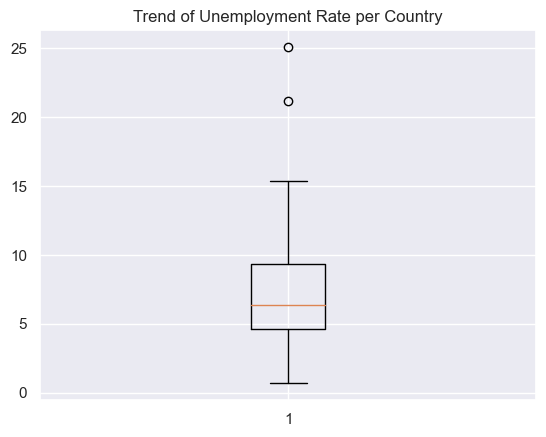

In [9]:
plt.boxplot(data_aggregate['Unemployment rate'] )
plt.title('Trend of Unemployment Rate per Country')

Text(0.5, 1.0, 'Trend of Unemployment Rate per Country')

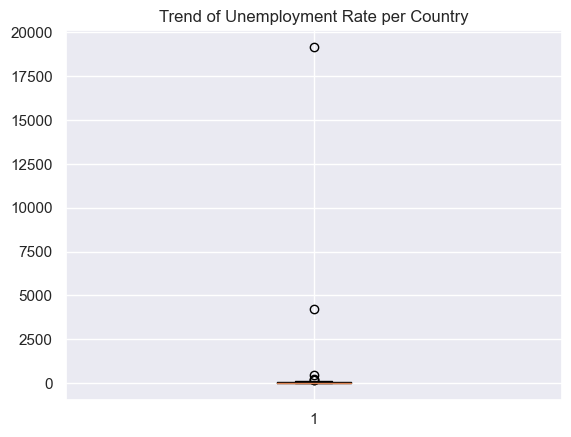

In [10]:
plt.boxplot(data_aggregate['population'] )
plt.title('Trend of Unemployment Rate per Country')

In [14]:
#removing outliers
data_aggregate = data_aggregate[(data_aggregate['Country Name'] != 'United States')]
data_aggregate = data_aggregate[(data_aggregate['Country Name'] != 'Italy')]

Text(0.5, 1.0, 'Trend of Population per Country')

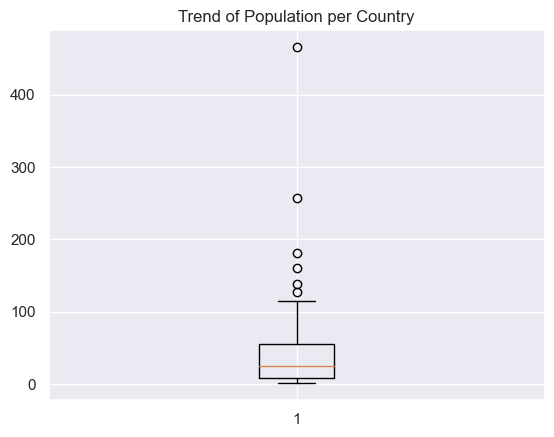

In [16]:
plt.boxplot(data_aggregate['population'] )
plt.title('Trend of Population per Country')